In [ ]:
import pandas as pd
import glob

file_paths = glob.glob('/content/Untitled Folder/*.csv')
all_dataframes = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    all_dataframes.append(df)

vehicles_df = pd.concat(all_dataframes, ignore_index=False)

vehicles_df.head()
vehicles_df.shape

## Display precentage of null valus

In [ ]:

null_counts = vehicles_df.isnull().sum()
print(null_counts)

null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
null_percentage = null_percentage.round(2)
print(null_percentage)


## Display the structure of the DataFrame

In [ ]:

vehicles_df.drop_duplicates(keep='first', inplace=True)
null_counts = vehicles_df.isnull().sum()
print(null_counts)
vehicles_df.isnull().sum().sum()
print(vehicles_df.info())
print(vehicles_df.describe())
print(vehicles_df.head())
print(123)
print(123)

In [ ]:
#Drop the valus that has all tha valus are null
vehicles_df.dropna(how='all', inplace=True)

# Check to confirm no null values remain
vehicles_df[['Vehicle Model Year', 'ZIP Code']] = vehicles_df[['Vehicle Model Year', 'ZIP Code']].interpolate(method='linear')

#fill the missing valus
vehicles_df=vehicles_df.fillna({'Vehicle Model':'unknown','Vehicle Make':'unknown','Vehicle Color':'unknown','Vehicle Make':'unknown','Address':'unknown','City':'unknown','State':'unknown','Taxi Affiliation':'Affiliation unknown','Taxi Medallion License Management ':'unknown'})

null_counts = vehicles_df.isnull().sum()
print(null_counts)

In [ ]:
vehicles_df.head()

## Adding new columns and Column Removal

In [ ]:
#Adding new columns to the Dataframe
vehicles_df['Vehicle Type'] = vehicles_df['Record ID'].apply(lambda x: x.split('-')[0])

#Column Removal
vehicles_df.drop(columns=['Address', 'Public Vehicle Number'], inplace=True)



In [ ]:

vehicles_df.head()

## Handle outliers and missing values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use a list instead of a set to select columns
sns.boxplot(data=vehicles_df[['Unnamed: 0','Public Vehicle Number','Vehicle Model Year', 'ZIP Code']])
plt.show()

In [ ]:
import numpy as np

def handle_outliers(vehicles_df, cols):
    for col in cols:
        if pd.api.types.is_numeric_dtype(vehicles_df[col]):
            Q1 = vehicles_df[col].quantile(0.25)
            Q3 = vehicles_df[col].quantile(0.75)
            IQR = Q3 - Q1
            LL, UL = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            vehicles_df[col] = np.clip(vehicles_df[col], LL, UL)  # Cap outliers to boundaries
    return vehicles_df

numeric_cols = vehicles_df.select_dtypes(include=['number']).columns
vehicles_df = handle_outliers(vehicles_df, numeric_cols)


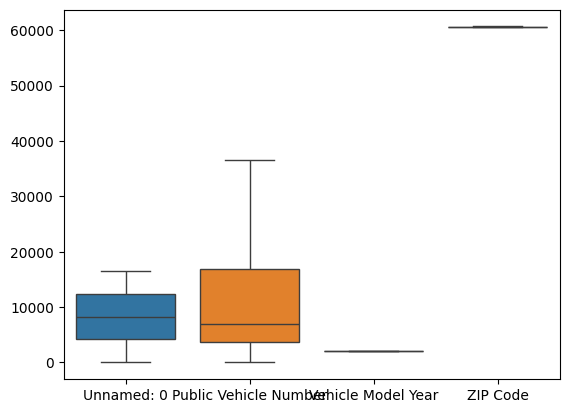

In [ ]:
sns.boxplot(data=vehicles_df[['Unnamed: 0','Public Vehicle Number','Vehicle Model Year', 'ZIP Code']])
plt.show()

## Dashboard

In [ ]:
pip install jupyter_dash

In [ ]:
pip install Dash

### Prepare data for visualizations

In [ ]:

from dash import Dash, dcc, html
import plotly.express as px

required_columns = ['Vehicle Make', 'Wheelchair Accessible', 'Status',
                    'Vehicle Model Year', 'ZIP Code', 'Taxi Affiliation']
for col in required_columns:
    if col not in vehicles_df.columns:
        print(f"Column {col} is missing in the data.")


# Prepare data for visualizations
vehicle_make_distribution = vehicles_df['Vehicle Make'].value_counts().reset_index()
vehicle_make_distribution.columns = ['Vehicle Make', 'Count']

wheelchair_accessible = vehicles_df['Wheelchair Accessible'].value_counts().reset_index()
wheelchair_accessible.columns = ['Wheelchair Accessible', 'Count']

status_distribution = vehicles_df['Status'].value_counts().reset_index()
status_distribution.columns = ['Status', 'Count']

model_year_status = vehicles_df.groupby(['Vehicle Model Year', 'Status']).size().reset_index(name='Count')

zip_distribution = vehicles_df['ZIP Code'].value_counts().reset_index()
zip_distribution.columns = ['ZIP Code', 'Count']

taxi_affiliation = vehicles_df['Taxi Affiliation'].value_counts().reset_index()
taxi_affiliation.columns = ['Taxi Affiliation', 'Count']

license_management = vehicles_df['Taxi Medallion License Management '].value_counts().reset_index()
license_management.columns = ['License Management', 'Count']

# Filter and sort for better visualizations
vehicle_make_distribution = vehicle_make_distribution[vehicle_make_distribution['Count'] > 5]
vehicle_make_distribution.sort_values(by='Count', ascending=False, inplace=True)

zip_distribution = zip_distribution[zip_distribution['Count'] > 10]

# Create the Dash app
app = Dash(__name__)



<IPython.core.display.Javascript object>

### Define the app layout

In [ ]:


# Define the app layout
app.layout = html.Div([
    html.H1("Vehicle Dashboard", style={'textAlign': 'center'}),

    # Section 1: Vehicle Overview
    html.Div([
        html.H2("Vehicle Overview"),
        dcc.Graph(figure=px.bar(vehicle_make_distribution, x='Vehicle Make', y='Count',
                                 title="Vehicles by Make", color='Vehicle Make')),
        dcc.Graph(figure=px.pie(wheelchair_accessible, names='Wheelchair Accessible', values='Count',
                                 title="Wheelchair Accessible Vehicles")),
    ]),

    # Section 2: Operational Status
    html.Div([
        html.H2("Operational Status"),
        dcc.Graph(figure=px.bar(status_distribution, x='Status', y='Count',
                                 title="Vehicle Status Distribution", color='Status')),
        dcc.Graph(figure=px.line(model_year_status, x='Vehicle Model Year', y='Count',
                                  color='Status', title="Status Trends by Model Year")),
    ]),

    # Section 3: Geographical Insights
    html.Div([
        html.H2("Geographical Insights"),
        dcc.Graph(figure=px.bar(zip_distribution, x='ZIP Code', y='Count',
                                 title="Vehicles by ZIP Code", color='ZIP Code')),
    ]),

    # Section 4: Affiliation & Management
    html.Div([
        html.H2("Affiliation & Management"),
        dcc.Graph(figure=px.bar(taxi_affiliation, x='Taxi Affiliation', y='Count',
                                 title="Vehicles by Taxi Affiliation", color='Taxi Affiliation')),
        dcc.Graph(figure=px.pie(license_management, names='License Management', values='Count',
                                 title="License Management Types")),
    ]),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
# Define the app layout
app.layout = html.Div([
    html.H1("Vehicle Dashboard", style={'textAlign': 'center'}),

    # Section 1: Vehicle Overview
    html.Div([
        html.H2("Vehicle Overview"),
        dcc.Graph(figure=px.bar(vehicle_make_distribution, x='Vehicle Make', y='Count',
                                 title="Vehicles by Make", color='Vehicle Make')),
        dcc.Graph(figure=px.pie(wheelchair_accessible, names='Wheelchair Accessible', values='Count',
                                 title="Wheelchair Accessible Vehicles")),
    ]),

    # Section 2: Operational Status
    html.Div([
        html.H2("Operational Status"),
        dcc.Graph(figure=px.bar(status_distribution, x='Status', y='Count',
                                 title="Vehicle Status Distribution", color='Status')),
        dcc.Graph(figure=px.line(model_year_status, x='Vehicle Model Year', y='Count',
                                  color='Status', title="Status Trends by Model Year")),
    ]),

    # Section 3: Geographical Insights
    html.Div([
        html.H2("Geographical Insights"),
        dcc.Graph(figure=px.bar(zip_distribution, x='ZIP Code', y='Count',
                                 title="Vehicles by ZIP Code", color='ZIP Code')),
    ]),

    # Section 4: Affiliation & Management
    html.Div([
        html.H2("Affiliation & Management"),
        dcc.Graph(figure=px.bar(taxi_affiliation, x='Taxi Affiliation', y='Count',
                                 title="Vehicles by Taxi Affiliation", color='Taxi Affiliation')),
        dcc.Graph(figure=px.pie(license_management, names='License Management', values='Count',
                                 title="License Management Types")),
    ]),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
### Define the app layout
# Define the app layout
app.layout = html.Div([
    html.H1("Vehicle Dashboard", style={'textAlign': 'center'}),

    # Section 1: Vehicle Overview
    html.Div([
        html.H2("Vehicle Overview"),
        dcc.Graph(figure=px.bar(vehicle_make_distribution, x='Vehicle Make', y='Count',
                                 title="Vehicles by Make", color='Vehicle Make')),
        dcc.Graph(figure=px.pie(wheelchair_accessible, names='Wheelchair Accessible', values='Count',
                                 title="Wheelchair Accessible Vehicles")),
    ]),

    # Section 2: Operational Status
    html.Div([
        html.H2("Operational Status"),
        dcc.Graph(figure=px.bar(status_distribution, x='Status', y='Count',
                                 title="Vehicle Status Distribution", color='Status')),
        dcc.Graph(figure=px.line(model_year_status, x='Vehicle Model Year', y='Count',
                                  color='Status', title="Status Trends by Model Year")),
    ]),

    # Section 3: Geographical Insights
    html.Div([
        html.H2("Geographical Insights"),
        dcc.Graph(figure=px.bar(zip_distribution, x='ZIP Code', y='Count',
                                 title="Vehicles by ZIP Code", color='ZIP Code')),
    ]),

    # Section 4: Affiliation & Management
    html.Div([
        html.H2("Affiliation & Management"),
        dcc.Graph(figure=px.bar(taxi_affiliation, x='Taxi Affiliation', y='Count',
                                 title="Vehicles by Taxi Affiliation", color='Taxi Affiliation')),
        dcc.Graph(figure=px.pie(license_management, names='License Management', values='Count',
                                 title="License Management Types")),
    ]),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
